## Abstract

The provided dataset is a structured compilation of films with a central theme or element of holidays, spanning almost a century from 1929 to 2022. The dataset includes various attributes such as the original title of the movie, its release year, the runtime in minutes, the genre(s), a simplified title, the average rating, the number of votes the movie received, and boolean indicators for its association with major holidays like Christmas, Hanukkah, Kwanzaa, and whether it is related to a holiday in general.

## How have popular movies changed over the decades?

### Introduction
The objective of the proposed analysis is to explore the evolution of popular holiday movies across decades. The focus will be on movies with average ratings in the upper two quartiles, which suggests a positive reception from viewers. This subset of data is essential to understand the shifting preferences of the audience in terms of genre, movie duration, and title length. By isolating films that are more favored, we aim to identify patterns that signify what attributes contribute to the success and popularity of holiday movies.

To answer this question, we will employ specific parts of the dataset that include the title, release year, genre, duration, and ratings of each movie. An additional variable—Title Length—will be calculated to examine the correlation between the length of a movie’s title and its popularity. Rating quartiles will be used to classify movies into different levels of reception. Furthermore, the Genre Count will provide insights into the complexity and variety within holiday movies. This analysis is not just a reflection of cinematic trends but also serves to illuminate the changing cultural landscape surrounding holiday themes in films, thus offering valuable information to both film enthusiasts and industry analysts.

### Approach
To address the question of how popular holiday movies have changed over the decades, our approach will involve a blend of descriptive statistics and visual analysis. Firstly, we will perform quartile analysis to categorize movies based on their average ratings. This method segments the data into four equal parts, allowing us to focus specifically on movies in the 3rd to 4th quartile range, which are deemed popular by viewers. Quartile analysis is an effective way to filter the dataset and ensure that the subsequent trends we observe are representative of films that have been well-received, providing a clear picture of what attributes are associated with higher ratings.

For the visual analysis, two types of plots will be created. The first plot will be a multi-faceted bar chart that illustrates the distribution of genres within the top quartiles over different decades. By using color mapping, we will be able to distinguish between genres within the same time frame easily, which will enable us to identify any shifts in genre popularity or diversification trends. The second plot will be a scatter plot correlating movie duration and average rating, with movies also color-coded based on their title length. This will allow us to observe if there's a preferred movie length that correlates with higher ratings, and whether longer or shorter movie titles are trending among the more popular films. The use of facets will further enhance this analysis by breaking down these trends by decade, giving us a temporal perspective on how these relationships have evolved over time. Both methods combined will provide a comprehensive understanding of the dynamics of popular holiday movies, highlighting changes in consumer preferences and industry patterns.

### Analysis

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/vy/_ckqsb7n1bx6d56hzjb3vw040000gn/T/ipykernel_7681/3222490598.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [11]:

# Load the dataset
df = pd.read_csv('data/holiday_movies.csv')
new_genres = pd.read_csv('data/holiday_movie_genres.csv')

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Strategy for handling missing values
# Drop rows where 'genres' is missing and use .copy() to avoid SettingWithCopyWarning
df_cleaned = df.dropna(subset=['genres']).copy()

# Impute missing values in 'runtime_minutes' with the median of the non-missing values
median_runtime = df_cleaned['runtime_minutes'].median()
df_cleaned.loc[:, 'runtime_minutes'] = df_cleaned['runtime_minutes'].fillna(median_runtime)

# Verify the imputation by checking if there are still missing values in 'runtime_minutes'
missing_after_imputation = df_cleaned.isnull().sum()
print(f"Missing Value after modification : {missing_after_imputation}")

# Create new variables on the cleaned dataset
# Calculate the length of each movie title using .loc to safely modify the DataFrame
df_cleaned.loc[:, 'title_length'] = df_cleaned['original_title'].apply(len)

# Determine the rating quartile for each movie
df_cleaned.loc[:, 'rating_quartile'] = pd.qcut(df_cleaned['average_rating'], 4, labels=False)

# Count the number of genres per movie, handling NaN if present
df_cleaned.loc[:, 'genre_count'] = df_cleaned['genres'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# Filter to include only movies in the 3rd and 4th rating quartiles and use .copy() for top_movies
top_movies = df_cleaned[df_cleaned['rating_quartile'] >= 2].copy()

# Organize the data by decades using .loc to avoid SettingWithCopyWarning
top_movies.loc[:, 'decade'] = (top_movies['year'] // 10) * 10

#Merge the new genre dataset with the  existing cleaned DataFrame
merged_df = pd.merge(top_movies, new_genres, on='tconst', how='left')


tconst               0
title_type           0
primary_title        0
original_title       0
year                 0
runtime_minutes    189
genres              32
simple_title         0
average_rating       0
num_votes            0
christmas            0
hanukkah             0
kwanzaa              0
holiday              0
dtype: int64
Missing Value after modification : tconst             0
title_type         0
primary_title      0
original_title     0
year               0
runtime_minutes    0
genres             0
simple_title       0
average_rating     0
num_votes          0
christmas          0
hanukkah           0
kwanzaa            0
holiday            0
dtype: int64


/var/folders/vy/_ckqsb7n1bx6d56hzjb3vw040000gn/T/ipykernel_7681/3658963115.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


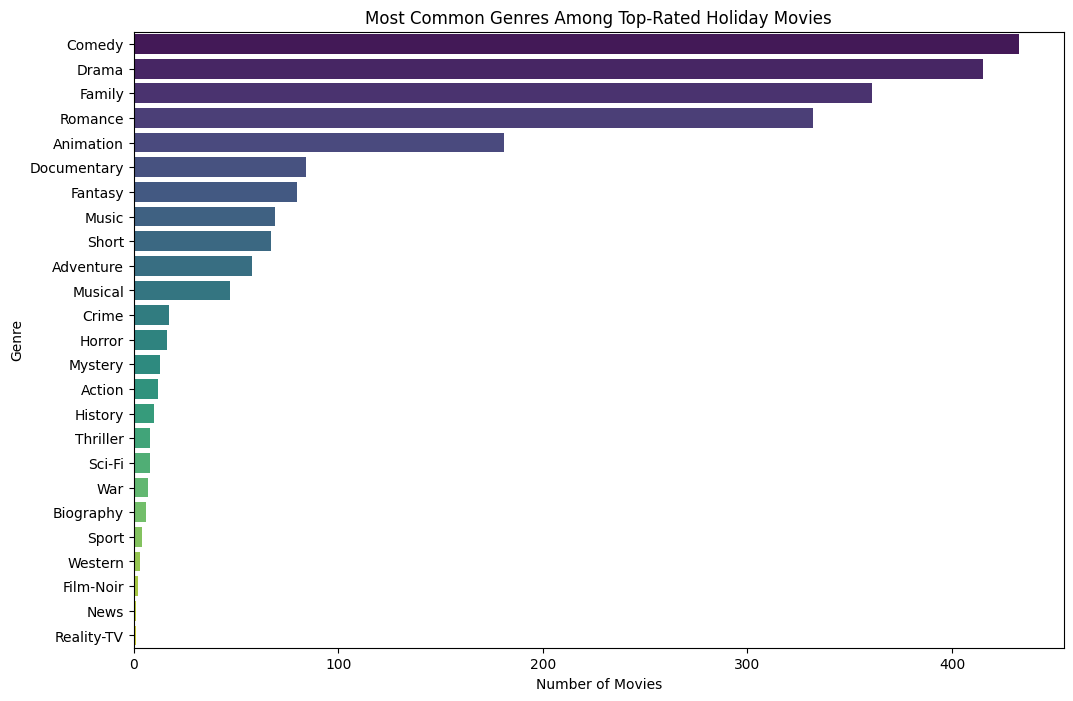

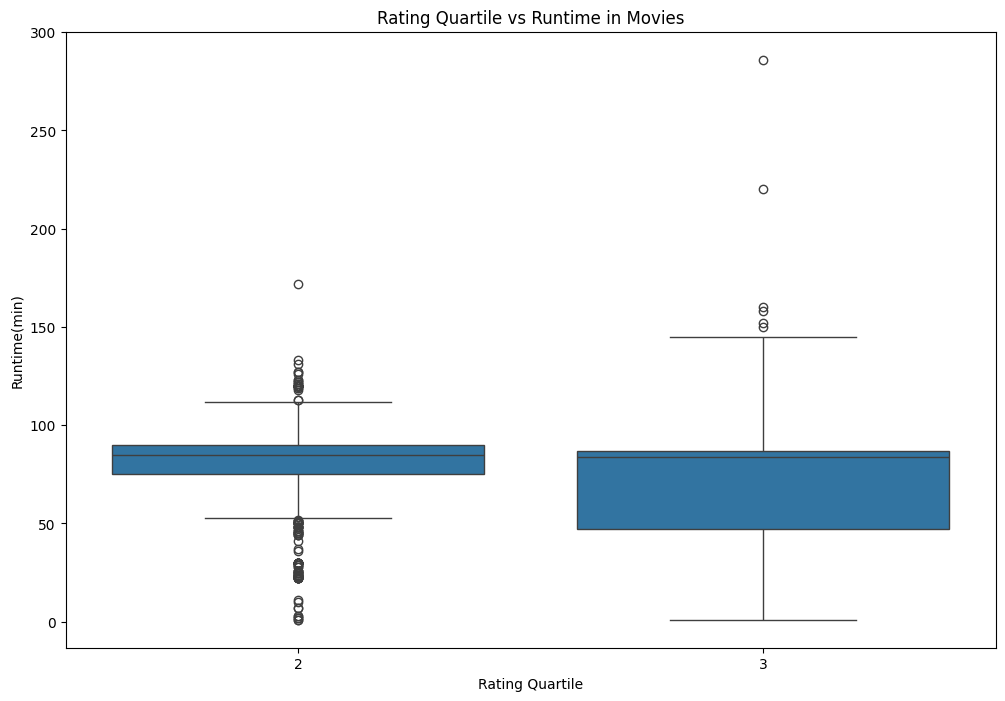

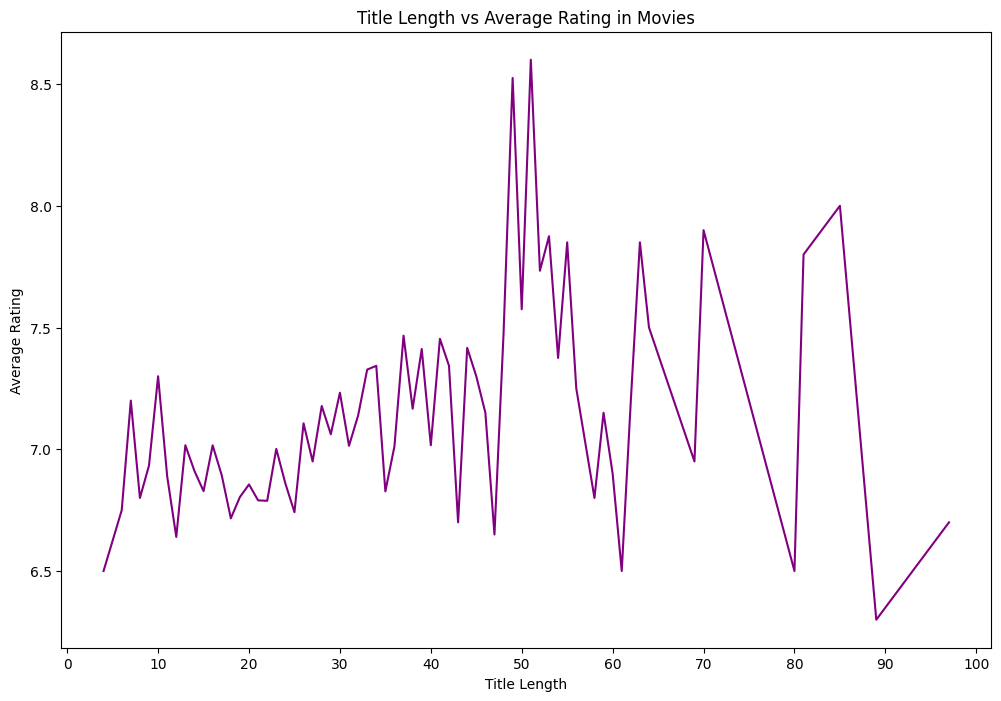

In [13]:
#Genre Analysis

# Count the frequency of each genre within the 3rd and 4th rating quartiles
genre_counts = merged_df['genres_y'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Most Common Genres Among Top-Rated Holiday Movies')
plt.show()


# Duration Analysis plot

# Create a boxplot to visualize the distribution of movie runtimes across different rating quartiles
# 'x' specifies the categorical variable 'rating_quartile' for the x-axis
# 'y' specifies the numerical variable 'runtime_minutes' for the y-axis
plt.figure(figsize=(12, 8))
sns.boxplot(x="rating_quartile", y="runtime_minutes", data=top_movies)
plt.xlabel("Rating Quartile")
plt.ylabel("Runtime(min)")
plt.title("Rating Quartile vs Runtime in Movies")
plt.show()

#Title Length Analysis plot

# Create a line plot to visualize the relationship between the length of movie titles and their average ratings
# 'x' specifies the numerical variable 'title_length' for the x-axis
# 'y' specifies the numerical variable 'average_rating' for the y-axis
plt.figure(figsize=(12, 8))
sns.lineplot(x="title_length", y="average_rating", data=top_movies, color="purple", errorbar=None)
x_intervals = np.arange(0, max(top_movies['title_length']) + 10, 10)
plt.xticks(x_intervals)
plt.xlabel("Title Length")
plt.ylabel("Average Rating")
plt.title("Title Length vs Average Rating in Movies")
plt.show()


## Discussion
From the genre distribution bar plot, we can observe that Comedy and Drama are the most common genres among top-rated holiday movies. This predominance might suggest that audiences tend to prefer lighter and more emotionally resonant stories during holiday seasons, which aligns with the festive and familial spirit of such times. Family and Romance genres follow, which further emphasizes the desire for movies that bring people together, reflecting typical holiday themes centered around love, family, and togetherness.

The second plot, showcasing the relationship between movie runtime and rating quartile, indicates that there isn't a strong preference for movie length within the top rating quartiles. While there is a concentration of movies with runtimes around 100 minutes (typical for standard feature films), the presence of highly-rated movies with longer runtimes suggests that a film's duration is less significant to its reception compared to other factors such as story, acting, and direction. However, the spread of runtimes in the 3rd quartile is narrower than in the 4th, hinting that exceptionally well-received movies might have a tighter consistency in their duration.

The line plot correlating title length with average rating shows a more erratic relationship. While no clear trend is discernible, there appears to be a slight tendency for movies with shorter titles to have higher ratings, although there are exceptions at various points. This might imply that conciseness in a title could be associated with a film's memorability or marketing effectiveness, but the numerous outliers make it difficult to draw a definitive conclusion.